<ins><strong>Machine Learning Essentials : CSE1015 : Lab - 13 : Ensemble Learning using Random Forest</strong></ins>


<ins><strong>Name:</strong></ins> Gaurav Pendharkar


<ins><strong>Registration No.:</strong></ins> 20BAI1153

# Importing the required modules

In [1]:
# Modules for data handling in python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modules for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Reading the dataset

In [2]:
nasa = pd.read_csv("./nasa.csv")

In [3]:
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

# Dropping non-useful columns 

In [4]:
nasa = nasa.drop(list(nasa.columns)[0:2]+['Equinox','Close Approach Date','Orbit Determination Date','Orbit ID','Orbiting Body'],axis=1)

# Segregation of columns

In [5]:
target = 'Hazardous'

In [6]:
numerical = set(nasa.columns).difference(set([target]))

# Test-Train Split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(nasa,
    nasa[target],
    test_size = 0.30,
    train_size=0.70,
    random_state = 0
)

In [8]:
X_train = X_train.drop([target],axis=1)
X_test = X_test.drop([target],axis=1)

# Random Forest

In [9]:
clf = RandomForestClassifier(random_state=0,oob_score=True)

In [10]:
clf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True, random_state=0)

In [11]:
print("Accuracy on Train Dataset :",clf.score(X_train, y_train))
print("Accuracy on Test Dataset :",clf.score(X_test, y_test))

Accuracy on Train Dataset : 1.0
Accuracy on Test Dataset : 0.9950248756218906


In [12]:
clf.oob_score_

0.9954268292682927

# Exploring the hyperparameters

In [13]:
outofbagscore = []
trainacc = []
testacc = []
for i in range(50,100,5):
    for j in range(15,30,3):
        clf = RandomForestClassifier(n_estimators=i,max_depth=j,random_state=0,oob_score=True)
        clf.fit(X_train,y_train)
        outofbagscore.append(clf.oob_score_)
        trainacc.append(clf.score(X_train, y_train))
        testacc.append(clf.score(X_test, y_test))

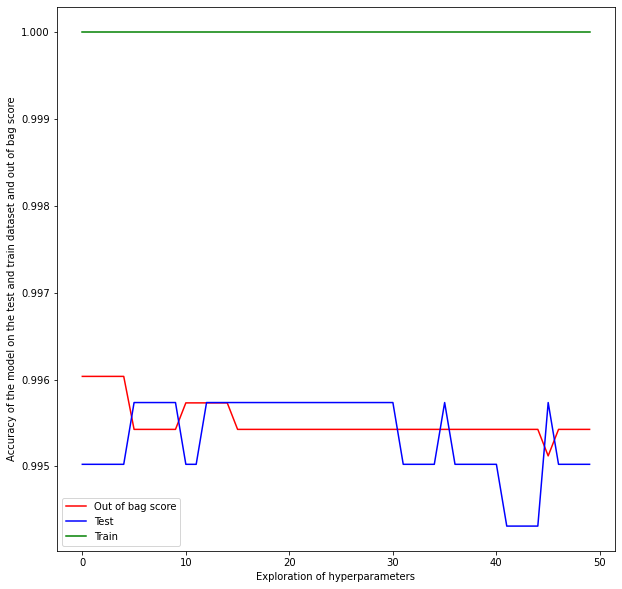

In [18]:
plt.figure(figsize=(10,10))
plt.plot(range(0,len(outofbagscore)),outofbagscore,color="red")
plt.plot(range(0,len(testacc)),testacc,color="blue")
plt.plot(range(0,len(trainacc)),trainacc,color="green")
plt.xlabel("Exploration of hyperparameters")
plt.ylabel("Accuracy of the model on the test and train dataset and out of bag score")
plt.legend(["Out of bag score","Test","Train"])
plt.show()

From the graph we can infer that random forest model is performing well on both train and test dataset however in an ensemble learning model we may also consider the Out of Bag Score. Since, there is no huge difference between the accuracies on test and train datasets we can choose the set of hyperparameters which give higher Out of Bag Score.

<ins><strong>Inferences:</strong></ins>
- The random forest model takes a shorter time to execute than a normal decision tree model.
- The random forest model is also improving the accuracy slightly when the same dataset was used to train decision trees in a previous lab. However, we can only consider the improvement after cross validation.